# Prodigy_Infotech Task - 04

## Problem Statement : 
###                   Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import the libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('archive (6)/twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
col_names = ['ID','Entity','Sentiments','Contest']
df1 = pd.read_csv('archive (6)/twitter_training.csv', names = col_names)

In [6]:
df1.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df1.tail()

,ID,Entity,Sentiments,Contest
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [8]:
df1.shape

(74682, 4)

In [9]:
df.describe

<bound method NDFrame.describe of        2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just r

In [10]:
df1.isna().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

In [11]:
df1.dropna(axis=0,inplace=True)

In [12]:
df1.isna().sum()

ID            0
Entity        0
Sentiments    0
Contest       0
dtype: int64

In [13]:
df1.duplicated().sum()

np.int64(2340)

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [15]:
df1.shape

(73996, 4)

In [16]:
sentiment_counts = df1['Sentiments'].value_counts()
sentiment_counts

Sentiments
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

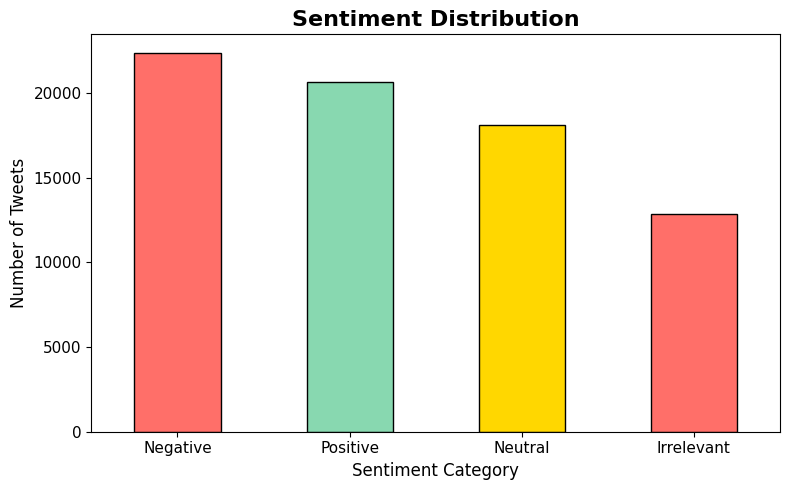

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sentiment_counts.plot(
    kind='bar',
    color=['#ff6f69', '#88d8b0', '#ffd700'], 
    edgecolor='black'
)

plt.title('Sentiment Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)

plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


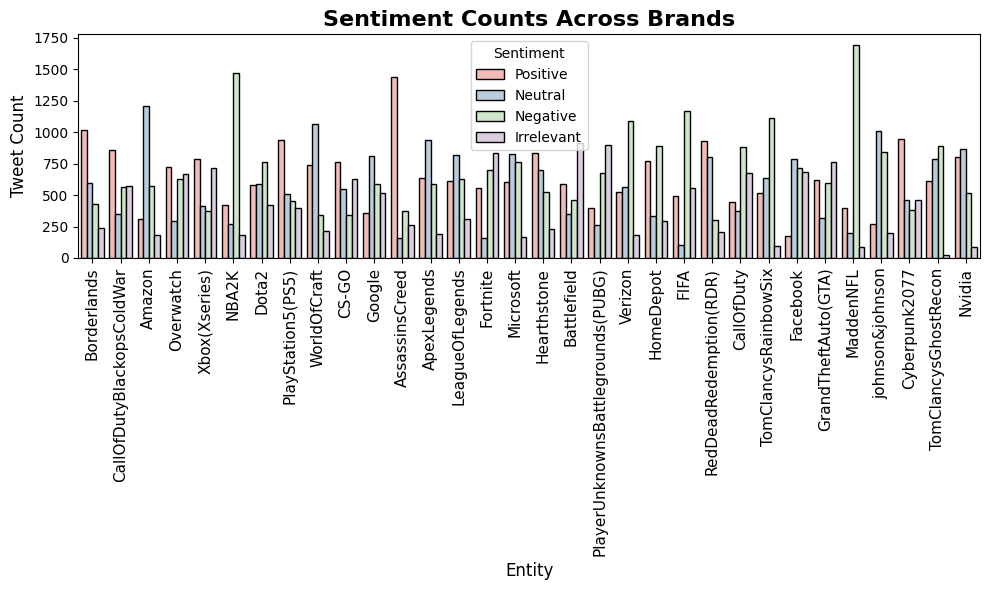

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(
    data = df1,
    x ='Entity',
    hue ='Sentiments',
    palette ='Pastel1',
    edgecolor ='black'
)

plt.title('Sentiment Counts Across Brands', fontsize=16, fontweight='bold')
plt.xlabel('Entity', fontsize=12)
plt.ylabel('Tweet Count', fontsize=12)
plt.xticks(rotation = 90, fontsize=11)
plt.legend(title ='Sentiment', fontsize=10)
plt.tight_layout()
plt.show()


In [29]:
# The Microsoft entity reveiw analysis
brand_data=df1[df1['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiments'].value_counts()
brand_sentiment_counts

Sentiments
Neutral       825
Negative      764
Positive      602
Irrelevant    170
Name: count, dtype: int64

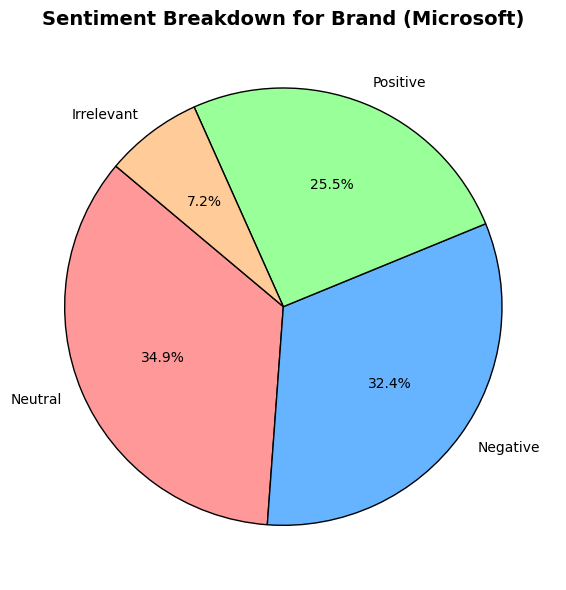

In [33]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(6, 6))
plt.pie(
    brand_sentiment_counts,
    labels=brand_sentiment_counts.index,
    autopct='%1.1f%%',        
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Sentiment Breakdown for Brand (Microsoft)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


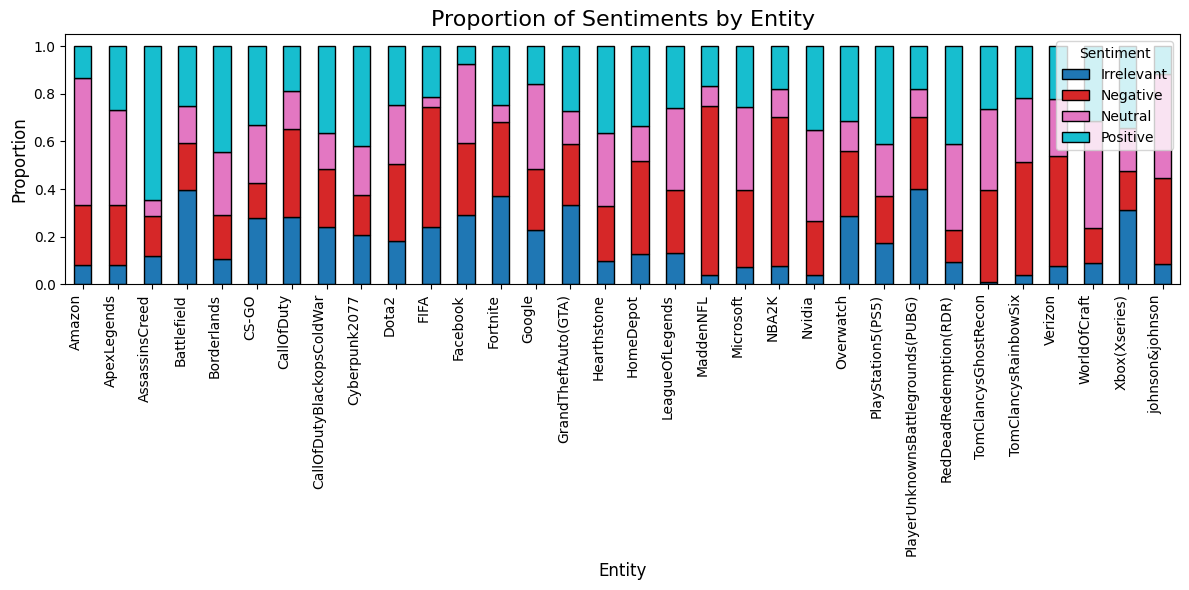

In [36]:
sentiment_prop = df1.groupby(['Entity', 'Sentiments']).size().unstack().fillna(0)
sentiment_prop = sentiment_prop.div(sentiment_prop.sum(axis=1), axis=0) 

sentiment_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab10',
    edgecolor='black'
)

plt.title('Proportion of Sentiments by Entity', fontsize=16)
plt.xlabel('Entity', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

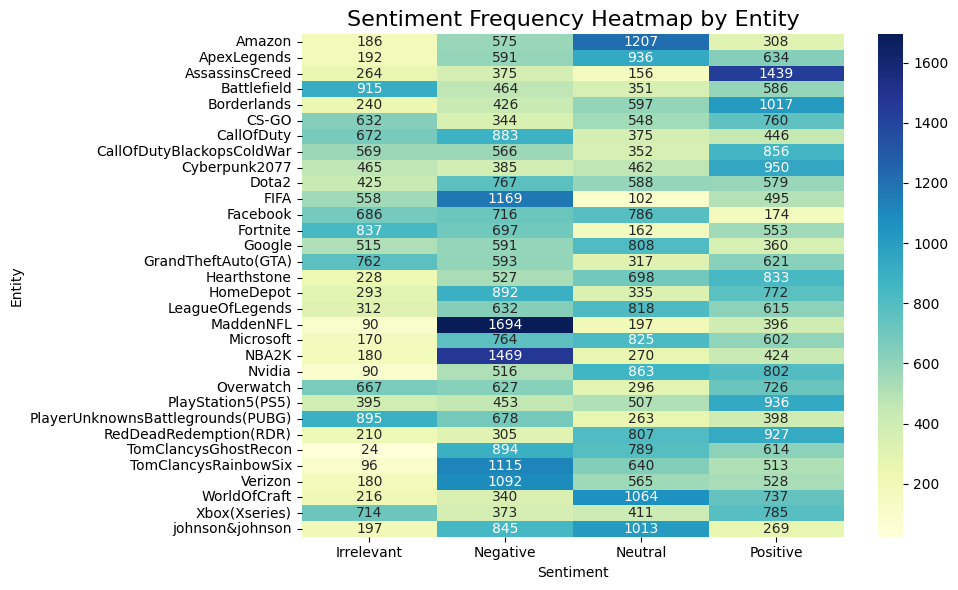

In [37]:
heat_data = df1.groupby(['Entity', 'Sentiments']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heat_data, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Sentiment Frequency Heatmap by Entity', fontsize=16)
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()